# Google Store App Rating Prediction

## Problem statement

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable.  It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful.
We can collect app data and user ratings from the app stores and use it to extract insightful information.
A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 


As part of this exercise we will try to predict rating for an app given features like size, number of downloads, etc.



## Data Set Information

Shape - 10841 entries and 13 columns

Attributes - 

App: Application name

Category: Category the app belongs to

Rating: Overall user rating of the app 

Reviews: Number of user reviews for the app

Size: Size of the app 

Installs: Number of user downloads/installs for the app 

Type: Paid or Free

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store 

Current Ver: Current version of the app available on Play Store 

Android Ver: Min required Android version 


Mount Drive (if using Colab)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1.Import Pandas and Read the Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection  import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [3]:
 df= pd.read_csv('Apps_data+(1).csv')

In [4]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


## 2. EDA and Preprocessing

### 2.1 Check info and summary statistics of the dataset. List out the columns that need to be worked upon for model building


Check summary Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Sample 5 examples from the Rating column

In [8]:
df['Rating'].sample(5)

10624    2.9
9104     NaN
6543     4.5
8836     3.9
9415     2.4
Name: Rating, dtype: float64

Check for NaN values

In [9]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

check summary statics for object type columns


In [10]:
df.describe(include=['O'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### 2.2 App Column

Let's look closely at the apps in the data 

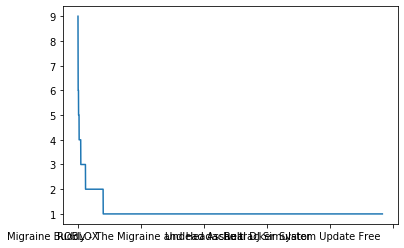

In [11]:
df['App'].value_counts().plot()

Tak 3 sample Apps for exploration (for eg: 'ROBLOX', 'ESPN','Nick')

In [12]:
df[df['App'].isin(['ROBLOX','ESPN','Nick'])].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
917,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
937,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
963,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
992,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Drop other duplicate entries keeping the app with the highest reviews

In [13]:
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [14]:
df.shape

(10841, 13)

Drops other duplicate entries keeping the App with the highest reviews

In [15]:
df.drop_duplicates('App', keep = 'last', inplace = True)


verify that duplicates has been removed

In [16]:
df['App'].value_counts()

CW Seed                                 1
Firefighters First CU                   1
Arrow.io                                1
A-Z Screen Recorder -                   1
Wheretoget: Shop in style               1
                                       ..
Verify - Receipts & Expenses            1
Interpret Chest X-Ray With 100 Cases    1
Ustream                                 1
Electrician Calculator Pro              1
Z War-Zombie Modern Combat              1
Name: App, Length: 9660, dtype: int64

Check shape of the dataframe

In [17]:
df.shape

(9660, 13)

### 2.2 Category Column

Check out the App categories

In [18]:
df['Category'].value_counts()

FAMILY                 1906
GAME                    926
TOOLS                   829
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
ENTERTAINMENT            79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

drop the category named 1.9 unknown category and invalid category

In [19]:
df[df.Category == '1.9'] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Visualize App category column

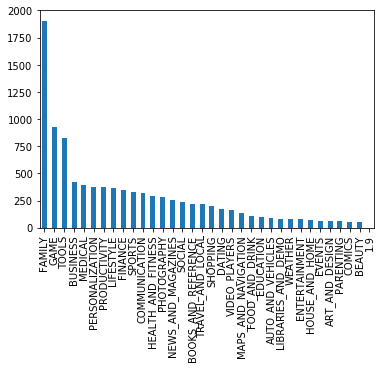

In [20]:
df['Category'].value_counts().plot(kind='bar')

### 2.3 Rating Column

Check summary statistics of Rating column

In [21]:
df['Rating'].describe()

count    8197.000000
mean        4.175027
std         0.560685
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

Check the rating distribution

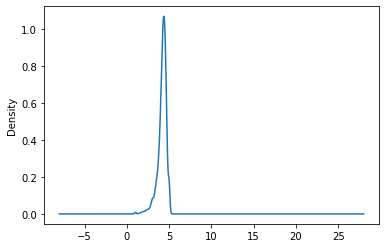

In [22]:
df['Rating'].plot(kind='kde')

Check the rating dataframe shape

In [23]:
df.shape

(9660, 13)

Check for null values in the rating dataframe

In [24]:
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Drop the NaN values

In [25]:
dff=df.dropna()
dff.shape

(8190, 13)

Convert ratings to high and low categories(>3.5 is high rest low)

In [26]:
dff["Rating_cat"]=dff["Rating"].apply(lambda x: "high" if x>3.5 else "low")


Add the categorical column to the data 

In [27]:
dff.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high


Check shape of the newly created dataframe

In [28]:
dff.shape

(8190, 14)

Check for null columns

In [29]:
dff.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating_cat        0
dtype: int64

Check count of high and low ratings

In [30]:
dff['Rating_cat'].value_counts()

high    7318
low      872
Name: Rating_cat, dtype: int64

Plot the same

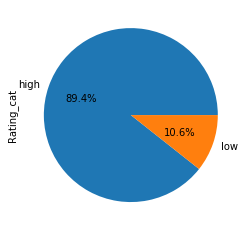

In [31]:
dff['Rating_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### 2.4 Review Column

Convert Reviews to numeric

In [32]:
dff['Reviews'] = pd.to_numeric(dff['Reviews'],errors= 'coerce')

Check info

In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   object 
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 959.8+ KB


 Review distibution 

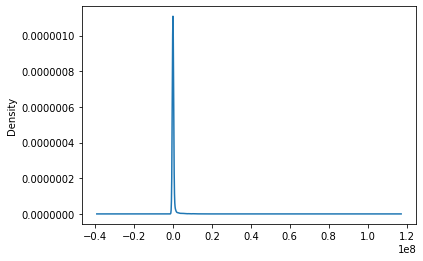

In [34]:
dff['Reviews'].plot(kind='kde')

### 2.5 Size Column

Working on Size column

The column currently contail alphanumeric values. 

Check count

In [35]:
dff['Size'].value_counts()

Varies with device    1169
14M                    148
12M                    146
13M                    143
11M                    143
                      ... 
144k                     1
317k                     1
556k                     1
226k                     1
717k                     1
Name: Size, Length: 413, dtype: int64

Replace M with 1 million and k with 1 thousand

In [36]:
dff['Size'].mode()[0]

'Varies with device'

In [37]:
dff['Size'] = dff['Size'].str.replace('M','e+3')
dff['Size'] = dff['Size'].str.replace('k','')

In [38]:
dff['Size'] = dff['Size'].str.replace('varies with device',dff['Size'].mode()[0])

Check Size values counts

In [39]:
dff['Size'].value_counts().head(5)

Varies with device    1169
14e+3                  148
12e+3                  146
11e+3                  143
13e+3                  143
Name: Size, dtype: int64

convert column to numeric, dropping non numeric values





In [40]:
dff['Size'] = pd.to_numeric(dff['Size'],errors= 'coerce')

Check info

In [41]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        8190 non-null   object 
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 959.8+ KB


Check for NaN values

In [42]:
dff['Size'].isna().sum()

1169

Drop NaN values

In [43]:
dff['Size'].mode()

0    14000.0
dtype: float64

In [44]:
dff['Size'].fillna(dff['Size'].mode()[0], inplace = True)

In [45]:
dff.shape

(8190, 14)

In [46]:
dff['Size'].isnull().sum()

0

### 2.6 Install Column

Check value counts

In [47]:
dff['Installs'].value_counts()

1,000,000+        1416
100,000+          1096
10,000+            986
10,000,000+        933
1,000+             695
5,000,000+         607
500,000+           502
50,000+            456
5,000+             424
100+               302
50,000,000+        204
500+               199
100,000,000+       189
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Replace , and + with space

In [48]:
dff['Installs'] = dff['Installs'].str.replace(',','')
dff['Installs'] = dff['Installs'].str.replace('+','')

Convert to numeric type

In [49]:
dff['Installs']=pd.to_numeric(dff['Installs'],errors = 'coerce')

check value counts

In [50]:
dff['Installs'].value_counts()

1000000       1416
100000        1096
10000          986
10000000       933
1000           695
5000000        607
500000         502
50000          456
5000           424
100            302
50000000       204
500            199
100000000      189
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

Check info

In [51]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   object 
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
 13  Rating_cat      8190 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 959.8+ KB


Get the bin levels

In [52]:
sort_install = dff['Installs'].sort_values().unique()
sort_install

array([         1,          5,         10,         50,        100,
              500,       1000,       5000,      10000,      50000,
           100000,     500000,    1000000,    5000000,   10000000,
         50000000,  100000000,  500000000, 1000000000], dtype=int64)

Create bins for Installs

In [53]:
len(sort_install)

19

In [54]:
dff['Install_cat'] = dff['Installs'].replace(sort_install,range(0,len(sort_install),1), inplace = False)

In [55]:
dff.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Install_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,8
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,13
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,15
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,10
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,high,9


### 2.7 Type

Get value counts

In [56]:
dff['Type'].value_counts()

Free    7590
Paid     600
Name: Type, dtype: int64

Plot pie chart for percentage of free vs paid app in store

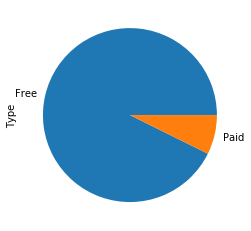

In [57]:
dff['Type'].value_counts().plot(kind = 'pie')

Check the columns and info

In [58]:
dff.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_cat', 'Install_cat'],
      dtype='object')

### 2.8 Price

Check value counts

In [59]:
dff['Price'].value_counts()

0          7590
$2.99       109
$0.99       103
$4.99        68
$1.99        59
           ... 
$13.99        1
$3.08         1
$15.99        1
$379.99       1
$1.76         1
Name: Price, Length: 73, dtype: int64

Replace $ with space

In [60]:
dff['Price'] = dff['Price'].str.replace('$','')

convert column to numeric, dropping non numeric values

In [61]:
dff['Price'] = pd.to_numeric(dff['Price'], errors = 'coerce')

In [62]:
dff['Price'].isna().sum()

0

Get summary statistics

In [63]:
dff['Price'].describe()

count    8190.000000
mean        1.035902
std        16.863402
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

## Data Preparation

Check info

In [64]:
dff.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_cat', 'Install_cat'],
      dtype='object')

In [65]:
pd.crosstab(dff['Category'],dff['Genres']).T

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Genres,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action;Action & Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure;Action & Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure;Brain Games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trivia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Video Players & Editors,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,148,0
Video Players & Editors;Music & Video,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop 'App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver' columns

In [66]:
df_final = dff.drop(['App','Content Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1)

One hot encode 'Rating_cat','Type','Category' columns

In [67]:
df_final = pd.get_dummies(df_final, columns=['Rating_cat','Type','Category'], drop_first = True)

In [68]:
df_final.shape

(8190, 40)

In [69]:
df_final.head()

,Rating,Reviews,Size,Installs,Price,Install_cat,Rating_cat_low,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000.0,10000,0.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000,0.0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000.0,50000000,0.0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000,0.0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,5600.0,50000,0.0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_final.isnull().sum()

Rating                          0
Reviews                         0
Size                            0
Installs                        0
Price                           0
Install_cat                     0
Rating_cat_low                  0
Type_Paid                       0
Category_AUTO_AND_VEHICLES      0
Category_BEAUTY                 0
Category_BOOKS_AND_REFERENCE    0
Category_BUSINESS               0
Category_COMICS                 0
Category_COMMUNICATION          0
Category_DATING                 0
Category_EDUCATION              0
Category_ENTERTAINMENT          0
Category_EVENTS                 0
Category_FAMILY                 0
Category_FINANCE                0
Category_FOOD_AND_DRINK         0
Category_GAME                   0
Category_HEALTH_AND_FITNESS     0
Category_HOUSE_AND_HOME         0
Category_LIBRARIES_AND_DEMO     0
Category_LIFESTYLE              0
Category_MAPS_AND_NAVIGATION    0
Category_MEDICAL                0
Category_NEWS_AND_MAGAZINES     0
Category_PAREN

In [71]:
df_final['Rating_cat_low'].value_counts()

0    7318
1     872
Name: Rating_cat_low, dtype: int64

In [72]:
df_final.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Install_cat',
       'Rating_cat_low', 'Type_Paid', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER'],
      dtype='object')

Drop 'Rating_cat_Low','Rating' columns for feature and make 'Rating_cat_Low' as target

In [73]:
x = df_final.drop(['Rating_cat_low'], axis =1)
y = df_final['Rating_cat_low']

Split train and test samples(Split size = 0.3 and random_state = 42)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state=42)

## Model Building

### 4.1 Classification

Write a function to fit and print the model predictions, input parameters would be model, X_train, X_test, y_train and y_test

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def fit_n_print(model, x_train, x_test,y_train, y_test):# take the model, and data as inputs
    
    model.fit(x_train, y_train) # fit the model with the train data
    
    pred = model.predict(x_test) # make predictions on the test set
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    print(train_score)
    
    print(test_score)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    

## Results

### 5.1 Decision Trees

Pass decision tree model into the function 

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


fit_n_print(dt, x_train, x_test, y_train, y_test)


1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



Check feature importance

In [77]:
feature_importances = pd.DataFrame({'features':x_train.columns, 'Importance': dt.feature_importances_})
feature_importances

,features,Importance
0,Rating,1.0
1,Reviews,0.0
2,Size,0.0
3,Installs,0.0
4,Price,0.0
5,Install_cat,0.0
6,Type_Paid,0.0
7,Category_AUTO_AND_VEHICLES,0.0
8,Category_BEAUTY,0.0
9,Category_BOOKS_AND_REFERENCE,0.0


### 5.2 Random Forest

Pass Random forest model into the function

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

fit_n_print(dt, x_train, x_test, y_train, y_test)

1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



### 5.3 Bagging Classifier

Pass bagging classifier model into the function

In [79]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
fit_n_print(bg, x_train, x_test, y_train, y_test)

1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



### 5.4 Gradient Boosting

Pass Gradient boosting model into the function

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
fit_n_print(gb,x_train, x_test, y_train, y_test)

1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



Check feature importance

### 5.5 AdaBoosting

Pass AdaBoosting model into the function

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

fit_n_print(ab, x_train, x_test, y_train, y_test)

1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



### 5.6 Stacking

Pass stacking model into the function

In [82]:
from sklearn.ensemble import StackingClassifier
estimators = [('dt', dt), ('rf', rf), ('bg', bg), ('gb', gb), ('ab', ab)]
clf = StackingClassifier(estimators = estimators, final_estimator = rf)
fit_n_print(clf, x_train, x_test, y_train, y_test)

1.0
1.0
[[2195    0]
 [   0  262]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2195
           1       1.00      1.00      1.00       262

    accuracy                           1.00      2457
   macro avg       1.00      1.00      1.00      2457
weighted avg       1.00      1.00      1.00      2457



Pass Logistic regression model into the function

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fit_n_print(lr, x_train, x_test, y_train, y_test)

0.8935984650270364
0.8933658933658933
[[2195    0]
 [ 262    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2195
           1       0.00      0.00      0.00       262

    accuracy                           0.89      2457
   macro avg       0.45      0.50      0.47      2457
weighted avg       0.80      0.89      0.84      2457



## Conclusion

Infer your predictions and write down your observations

After undergoing these algorithms and process, we concluded that our hypothesis is true. Meaning you can predict the app ratings, however significant preprocessing must be done before you start the classification and regression processes.
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market! This shows that given the Size, Type, Price, Content Rating, and Genre of an app, we can predict about 91% accuracy if an app will have more than 100,000 installs and be a hit on the Google Play Store.